In [228]:
!pip install opendatasets --quiet

In [229]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [230]:
import opendatasets as od

In [231]:
import pandas as pd
import numpy as np

In [232]:
od.download('https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset')

Skipping, found downloaded files in "./sms-spam-collection-dataset" (use force=True to force download)


In [233]:
import os
os.listdir('./sms-spam-collection-dataset/')
dir='./sms-spam-collection-dataset/'
spam_df=pd.read_csv(dir+'spam.csv',encoding="ISO-8859-1")
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [234]:
spam_df=spam_df[["v1","v2"]]
spam_df.rename(columns={'v1':'Lables','v2':'Message'},inplace=True)
spam_df.head(),spam_df.shape

(  Lables                                            Message
 0    ham  Go until jurong point, crazy.. Available only ...
 1    ham                      Ok lar... Joking wif u oni...
 2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
 3    ham  U dun say so early hor... U c already then say...
 4    ham  Nah I don't think he goes to usf, he lives aro..., (5572, 2))

In [235]:
y=pd.get_dummies(spam_df[['Lables']])
Y=y.iloc[:,1]
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Lables_spam, Length: 5572, dtype: uint8


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


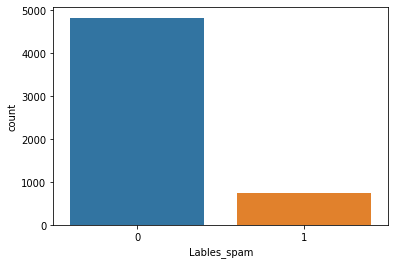

In [236]:
import seaborn as sns
sns.countplot(Y);

#We are having an imbalanced dataset

In [237]:
message=spam_df.iloc[:,1]
message

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

# Cleaning the text

In [238]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

In [239]:
corpus=[]
ps=PorterStemmer()
lem=WordNetLemmatizer()
for i in range(len(message)):
  text=re.sub('[^a-zA-Z]',' ',message[i])
  text=text.lower()
  text=text.split()
  text=[lem.lemmatize(word) for word in text if not word in stopwords.words('english')]
  text=' '.join(text)
  corpus.append(text)

In [240]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

In [241]:
X=tf.fit_transform(corpus).toarray()

# Splitting the data

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.15,shuffle=True)

In [244]:
from sklearn.naive_bayes import MultinomialNB

In [245]:
model=MultinomialNB().fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)
y_pred

In [247]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [248]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[727,   1],
       [ 27,  81]])

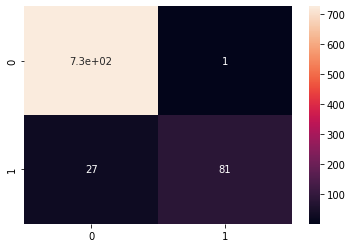

In [249]:
sns.heatmap(cm,annot=True)

In [250]:
acc=accuracy_score(y_test,y_pred)
acc

0.9665071770334929

In [251]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       728
           1       0.99      0.75      0.85       108

    accuracy                           0.97       836
   macro avg       0.98      0.87      0.92       836
weighted avg       0.97      0.97      0.96       836

